# <center>Mini Project 1_Generating Data with noise, Plotting Single file data with best fit curves and Multiple Text File Handling

                                                    September 8, 2022 
   
<h4>Mini Project 1

    
    
<h3>1_> - Generating Data with noise
    
<h3>2_>>  - Plotting Single file data with best fit curves

<h3>3_>>> - Multiple File Handling

In [12]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## <center> ) ) GENERATING DATA WITH NOISE ( (

In [13]:
import matplotlib.pyplot as plt                 
import numpy as np                             
from scipy.optimize import curve_fit             #SCIPY is used for curve Fit function and its module is optimize to import function curve_it

In [14]:
def func(x , a, b, c):
    return (a*np.exp(-b*x)+c)

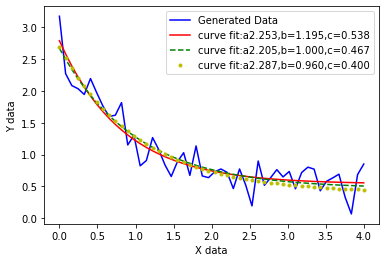

In [31]:
x_data = np.linspace(0, 4, 50)
y = func(x_data,2.5, 1.3, 0.5)
                                         #here noise is created (simple data for making plot)
rng = np.random.default_rng()
y_noise = 0.2*rng.normal(size=x_data.size)

y_data = y + y_noise
                                                        
plt.plot(x_data,y_data,'b-',label = 'Generated Data')     #normal data plot which follow any eqation

popt, pcov = curve_fit(func,x_data,y_data)
plt.plot(x_data,func(x_data,*popt),'r-',label='curve fit:a%5.3f,b=%5.3f,c=%5.3f'%tuple(popt))     #curve fitting

popt, pcov = curve_fit(func,x_data,y_data,bounds=(0,[3.0,1.0,0.5]))
plt.plot(x_data,func(x_data,*popt),'g--',label='curve fit:a%5.3f,b=%5.3f,c=%5.3f'%tuple(popt))    #bounds for different curve fitting 

popt, pcov = curve_fit(func,x_data,y_data,bounds=(0,[4.0,2.5,0.4]))
plt.plot(x_data,func(x_data,*popt),'y.',label='curve fit:a%5.3f,b=%5.3f,c=%5.3f'%tuple(popt)) 

plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend()
plt.show()

## <center> ) ) GAUSSIAN CURVE FITTING ( (

In [3]:
#importing Libraries
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
xd = np.arange(10)
yd = np.array([0,1,2,3,4,5,4,3,2,1])

mean = sum(xd * yd) / sum(yd)                                       #weighted airthmetic mean.
sigma = np.sqrt(sum(yd * (xd - mean)**2) / sum(yd))

In [5]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
                
popt,pcov = curve_fit(gauss, xd, yd, p0=[max(yd), mean, sigma]) #popt and pcov is the variables of curve fitting.

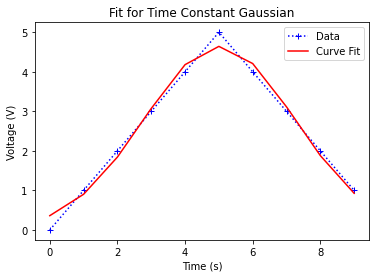

In [8]:
plt.plot(xd, yd, 'b+:', label='Data')                 #Plotting for xd and yd. 
plt.plot(xd, gauss(xd, *popt), 'r-', label='Curve Fit')     #Plotting for curve fitting.  
plt.legend()
plt.title('Fit for Time Constant Gaussian')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()                

# <center>  >>Plotting Single file data with best fit curves<<

### <center> ) ) Plotting text file data with Lognormal fitting curves ( (

In [5]:
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

In [6]:
def lognorm(x, mu, sigma):                      #defining a  function(our distribution)
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))

In [7]:
data = np.loadtxt('file_0.txt')                  #Loading our data set(importing our data to notebook).
x,y = data[:,0],data[:,1]                #data is save in x and y(in x 1st column is save and in y 2nd column is save respectively).

In [8]:
popt, _ = curve_fit(lognorm,x,y)    #curve fitting

mu, sigma = popt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


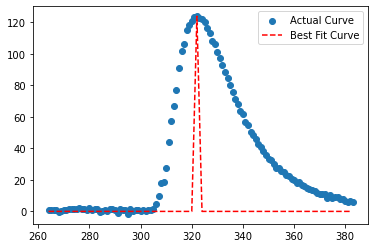

In [9]:
plt.scatter(x,y)

x_line = np.arange(min(x),max(x), 2)           #min(x) means start from x data and max(x) means ends from x data otherwise data is start from 0 then curve fitting is not fit properly
y_line = lognorm(x_line,mu,sigma)
plt.plot(x_line,y_line,'--',color ='red')
plt.legend(['Actual Curve',"Best Fit Curve"],loc="best")     #best for show on best location.
plt.show()                                                  #  >>UNDER FITTING  <<

### <center> ) ) Plotting text file data with Gaussian curves fitting ( (

In [10]:
data = np.loadtxt('file_0.txt')
x,y = data[:,0],data[:,1]  

In [11]:
def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

In [12]:
x1 = np.array(x)
n = len(x1)
mean = sum(x*y)/sum(y)
sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))


print(mean,sigma)

popt,pcov = curve_fit(gauss, x, y, p0=[max(y), mean, sigma]) 

331.5735786380477 16.231349238566057


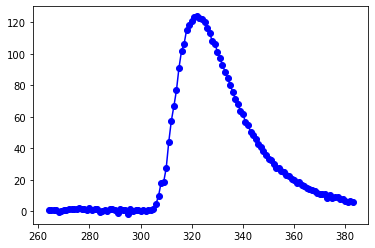

In [13]:
plt.plot(x,y,'-ob',label = 'our data');

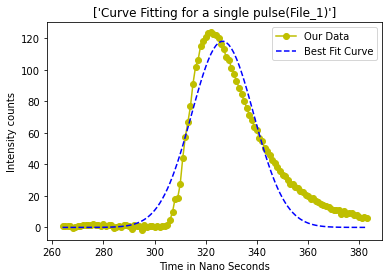

In [22]:
plt.plot(x,y,'-oy',label = 'Our Data');
plt.plot(x, gauss(x, *popt), 'b--', label='Best Fit Curve')
plt.legend()
plt.title(['Curve Fitting for a single pulse(File_1)'])
plt.xlabel('Time in Nano Seconds')
plt.ylabel('Intensity counts')
plt.show()

## <center> ) ) Multiple Text File Handling and Visualizing ( (

In [59]:
pwd

'C:\\Users\\CODERS READY'

[383.0, 395.0, 399.0, 393.0, 402.0, 384.0, 403.0, 397.0, 381.0, 396.0, 379.0, 407.0, 395.0, 387.0, 395.0, 377.0, 396.0, 391.0, 390.0, 405.0, 387.0, 398.0, 386.0, 394.0, 403.0, 384.0, 402.0, 397.0, 395.0, 393.0, 392.0, 403.0, 391.0, 381.0, 407.0, 390.0, 405.0, 385.0, 382.0, 399.0, 381.0, 389.0, 396.0, 385.0, 394.0, 376.0, 390.0, 388.0, 383.0, 401.0, 382.0, 390.0, 399.0, 386.0, 395.0, 378.0, 391.0, 390.0, 384.0, 402.0, 383.0, 388.0, 398.0, 384.0, 394.0, 393.0, 386.0, 389.0, 381.0, 398.0, 379.0, 399.0, 395.0, 379.0, 406.0, 390.0, 397.0, 403.0, 391.0, 410.0, 392.0, 391.0, 390.0, 389.0, 399.0, 383.0, 388.0, 395.0, 382.0, 399.0, 381.0, 396.0, 397.0, 393.0, 403.0, 388.0, 390.0, 401.0, 385.0, 403.0]
[5.9, 20.0, 8.8, 10.6, 9.2, 5.1, 16.3, 5.1, 10.0, 6.8, 9.1, 14.8, 5.0, 11.4, 10.0, 13.8, 10.3, 12.3, 36.7, 15.2, 10.8, 5.8, 12.9, 12.4, 11.0, 14.1, 9.3, 6.5, 14.3, 16.0, 15.4, 17.2, 3.8, 9.1, 12.7, 8.3, 6.0, 6.7, 15.2, 14.0, 11.8, 10.5, 14.3, 13.8, 18.4, 12.0, 14.6, 13.8, 11.3, 12.8, 10.4, 16.5, 4.

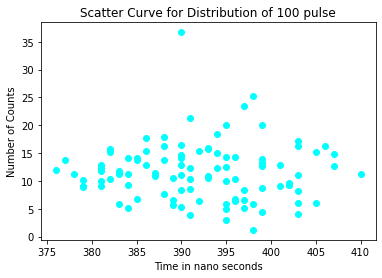

In [4]:
mypath ="C:/Users/CODERS READY/Mini Project Data"          #Path of the multiple data files. 

import os
os.chdir( mypath )
x=list()
y=list()
Tmax2=list()
Tmin2=list()
filenames=list()
rise=list()
decay=list()
for i in range (0,100):
    filenames.append('file_'+str(i)+'.txt')             #this is for append multiple files one by one acc. to loop range.
for a in filenames:
        temp=list()
        for b in open(a):                    
            temp=b.split()
        x.append(float(temp[0]))
        y.append(float(temp[1]))
for i in range(0, len(x) - 1):
    smallest = i
    for j in range(i + 1, len(x)):
        if x[j] < x[smallest]:
            smallest = j

x[i], x[smallest] = x[smallest], x[i]
y[i], y[smallest] = y[smallest], y[i]
print(x)
print(y)
print()
plt.scatter(x,y,color='aqua')
plt.title("Scatter Curve for Distribution of 100 pulse")
plt.xlabel("Time in nano seconds")
plt.ylabel("Number of Counts")
plt.show()